#### Kutuphanelerin ice aktarilmasi

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

#### RNN modeli ile eğitim

In [3]:
## istenen özellikler
features_ = 1000 # en sık kullanılan 1000 kelime 
max_len = 500  # max kelime sayısı 500
batch_size = 32

print("...loading")
(x_train,y_train), (x_test,y_test) = imdb.load_data(num_words = features_)

## model giriş boyutlarının eşit olması için pad_sequence ile eşitliyoruz.
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
x_train = sequence.pad_sequences(x_train, maxlen = max_len)

## Sequential ile model oluşturma (sıralı)
model = Sequential()
model.add(Embedding(features_,32))
model.add(SimpleRNN(32))  
### model.add(SimpleRNN(32, return_sequences=True)) 
### return_sequences ifadesinin True olması RNN katmanının tüm zaman adımlarındaki çıktılarını döndürmesini ve bu, sonraki katmanlara tüm 
### zaman adımlarındaki bilgiyi iletmeye yarar.
model.add(Dense(1,activation="sigmoid"))

## model derlenmesi
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

...loading
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - acc: 0.5478 - loss: 0.6852 - val_acc: 0.7136 - val_loss: 0.5533
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - acc: 0.6746 - loss: 0.6036 - val_acc: 0.6072 - val_loss: 0.7102
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - acc: 0.7155 - loss: 0.5481 - val_acc: 0.7664 - val_loss: 0.5105
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - acc: 0.7789 - loss: 0.4802 - val_acc: 0.7490 - val_loss: 0.5203
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - acc: 0.8138 - loss: 0.4166 - val_acc: 0.7662 - val_loss: 0.5380
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - acc: 0.8074 - loss: 0.4289 - val_acc: 0.7866 - val_loss: 0.5021
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - acc: 0.8700 - loss: 0.3207 - val_acc: 0.6030 - val_loss: 0.7366
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - acc: 0.8624 - loss: 0.3266 - val_acc: 0.7164 - val_loss: 0.6638
Epoch 9/10
625/625 ━━━━━━━━━━

#### LSTM ile eğitim

In [9]:
from tensorflow.keras import layers

In [12]:
## aynı işlemler LSTM için de yapılır
model1 = Sequential()
model1.add(layers.Embedding(features_,32))
model1.add(layers.Bidirectional(layers.LSTM(32)))
model1.add(Dense(1,activation="sigmoid"))

model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])
history1 = model1.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 128ms/step - acc: 0.6456 - loss: 0.5968 - val_acc: 0.8142 - val_loss: 0.4227
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - acc: 0.8104 - loss: 0.4262 - val_acc: 0.8354 - val_loss: 0.3858
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - acc: 0.8465 - loss: 0.3576 - val_acc: 0.8442 - val_loss: 0.3616
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - acc: 0.8619 - loss: 0.3311 - val_acc: 0.8528 - val_loss: 0.3626
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 135ms/step - acc: 0.8738 - loss: 0.3072 - val_acc: 0.8654 - val_loss: 0.3341
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - acc: 0.8598 - loss: 0.3263 - val_acc: 0.8568 - val_loss: 0.3564
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - acc: 0.8825 - loss: 0.2881 - val_acc: 0.6484 - val_loss: 0.5702
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 135ms/step - acc: 0.8132 - loss: 0.4057 - val_acc: 0.8484 - val_loss: 0.3648
Epoch 9/10
625/625 ━━━━━━━━━━━━━

#### Görselleştirme

In [15]:
import matplotlib.pyplot as plt

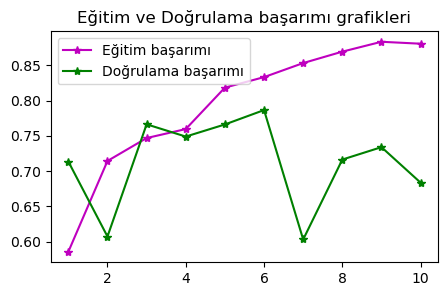

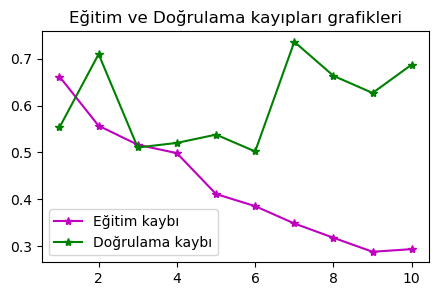

In [53]:
## RNN MODELİ İÇİN GÖRSELLEŞTİRME

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(5,3))
plt.plot(epochs, acc,"m*-",label="Eğitim başarımı")
plt.plot(epochs, val_acc,"g*-",label="Doğrulama başarımı")
plt.title("Eğitim ve Doğrulama başarımı grafikleri")
plt.legend()

plt.figure(figsize=(5,3))
plt.plot(epochs,loss,"m*-",label="Eğitim kaybı")
plt.plot(epochs,val_loss,"g*-",label="Doğrulama kaybı")
plt.title("Eğitim ve Doğrulama kayıpları grafikleri")
plt.legend()
plt.show()

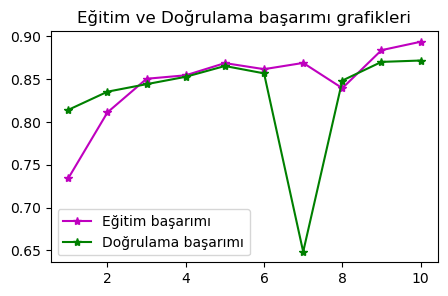

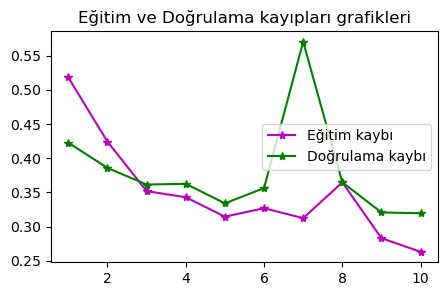

In [55]:
## LSTM  MODELİ İÇİN GÖRSELLEŞTİRME

acc = history1.history["acc"]
val_acc = history1.history["val_acc"]
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(5,3))
plt.plot(epochs, acc,"m*-",label="Eğitim başarımı")
plt.plot(epochs, val_acc,"g*-",label="Doğrulama başarımı")
plt.title("Eğitim ve Doğrulama başarımı grafikleri")
plt.legend()

plt.figure(figsize=(5,3))
plt.plot(epochs,loss,"m*-",label="Eğitim kaybı")
plt.plot(epochs,val_loss,"g*-",label="Doğrulama kaybı")
plt.title("Eğitim ve Doğrulama kayıpları grafikleri")
plt.legend()
plt.show()